In [1]:
!pip install pycaret

     |████████████████████████████████| 320 kB 4.9 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 1.7 MB 41.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 63.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 16.8 MB 1.0 MB/s 
     |████████████████████████████████| 116 kB 43.9 MB/s 
     |████████████████████████████████| 261 kB 43.5 MB/s 
     |████████████████████████████████| 2.0 MB 43.4 MB/s 
     |████████████████████████████████| 6.8 MB 48.4 MB/s 
     |████████████████████████████████| 88 kB 1.8 MB/s 
     |████████████████████████████████| 10.9 MB 29.2 MB/s 
     |████████████████████████████████| 636 kB 68.2 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |█████████████████

In [107]:
# importing all the libraries
import pandas as pd
#pd.set_option('max_columns',None)
#pd.set_option('max_rows',81)
import numpy as np
import random as rnd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import scipy.stats

#from pycaret.regression import setup,compare_models
from catboost import CatBoostRegressor

from sklearn.linear_model import BayesianRidge,HuberRegressor,Ridge,OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor

from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor

from xgboost import XGBRegressor

In [6]:
import pandas as pd
df = pd.read_csv(r'F:\Machine Learning\Macine Hack\Data\Train.csv')
df_test = pd.read_csv(r'F:\Machine Learning\Macine Hack\Data\Test.csv')

#df = pd.read_csv('/Train.csv')
#df_test = pd.read_csv('/Test.csv')

In [7]:
df.head(50)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [8]:
df.shape

(13320, 9)

In [9]:
df_test

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [10]:
target = df['price']

test_columns = df_test[['area_type','availability','location','size','society','total_sqft','bath','balcony']]

df1 = df.drop(['price'],axis=1)
df_test1 = df_test.drop(['price'],axis=1)

data = pd.concat([df1,df_test1],axis=0).reset_index(drop=True)

In [11]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0
...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0


In [12]:
data.shape

(14800, 8)

In [13]:
# Check null values
data.isnull().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath              80
balcony          678
dtype: int64

# EDA(Explanatory Data Analysis)

# total_sqft

In [14]:
len(data['total_sqft'].unique())

2221

In [15]:
data['total_sqft'].dtype

dtype('O')

In [16]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '3383', '5149', '6750'], dtype=object)

In [17]:
range_type = (data['total_sqft'].str.len()>4)

In [18]:
array = data[range_type]['total_sqft'].unique()

In [19]:
# 34.46Sq. Meter
# 1330.74
# 2100 - 2850
# 4125Perch
# 5.31Acres
# 547.34 - 827.31
# 1574Sq. Yards
# 3Cents
# 2.09Acres
#38Guntha

In [20]:
array

array(['2100 - 2850', '1330.74', '3010 - 3410', '2957 - 3450',
       '3067 - 8156', '1042 - 1105', '1563.05', '1145 - 1340',
       '1015 - 1540', '1520 - 1740', '2023.71', '1113.27', '12000',
       '34.46Sq. Meter', '11890', '1752.12', '1195 - 1440', '1200 - 2400',
       '4125Perch', '1120 - 1145', '4400 - 6640', '3090 - 5002', '35000',
       '4400 - 6800', '1160 - 1195', '1000Sq. Meter', '4000 - 5249',
       '10961', '1115 - 1130', '1100Sq. Yards', '520 - 645',
       '1000 - 1285', '3606 - 5091', '650 - 665', '633 - 666', '2112.95',
       '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '14000', '1440 - 1884', '1558.67', '3467.86', '716Sq. Meter',
       '547.34 - 827.31', '804.1', '580 - 650', '3425 - 3435', '1269.72',
       '1804 - 2273', '3630 - 3800', '660 - 670', '1500Sq. Meter',
       '620 - 933', '142.61Sq. Meter', '2695 - 2940', '2000 - 5634',
       '1574Sq. Yards', '3450 - 3472', '52272', '2479.13', '2172.65',
       '581.91', '1250 - 1305'

In [21]:
data1 = data.copy()

In [22]:
index = 0
for feature in data1['total_sqft']:

    if '-' in feature:
       # print(feature.index)
        res = feature.split(' - ')
        first = float(res[0])
        last = float(res[1])
        avg = (first+last)/2.0
        data1.at[index,'total_sqft_new'] = avg
        index+=1
        #print(res)
        #print(avg)
    
    elif 'Sq. Meter' in feature:
            sq = feature.split('Sq. Meter')
            sq_area = 10.76391042*float(sq[0])
            data1.at[index,'total_sqft_new'] = sq_area
            index+=1
            
            #print(sq_area)
            #print(feature)
    elif 'Perch' in feature:
        per = feature.split('Perch')
        per_area = 272.25 * float(per[0])
        data1.at[index,'total_sqft_new'] = per_area
        index+=1
        #print(per_area)
        #print(feature)
    elif 'Acres' in feature:
        acr = feature.split('Acres')
        acr_area = 43560*float(acr[0])
        data1.at[index,'total_sqft_new'] = acr_area
        index+=1
         #print(feature)
    elif 'Sq. Yards' in feature:
        sq_yeard = feature.split('Sq. Yards')
        
        sq_yeard_area = 9*float(sq_yeard[0])
        data1.at[index,'total_sqft_new'] = sq_yeard_area
        index+=1
        
        #print(feature)
    elif 'Cents' in feature:
        cent = feature.split('Cents')
        cent_area = 435.56 * float(cent[0])
        data1.at[index,'total_sqft_new'] = cent_area
        index+=1
        
        #print(feature)
    elif 'Guntha' in feature:
        guntha = feature.split('Guntha')
        guntha_area = 1089 * float(guntha[0])
        data1.at[index,'total_sqft_new'] = guntha_area
        index+=1
        
    elif 'Grounds' in feature:
        ground = feature.split('Grounds')
        ground_area = 2400 * float(ground[0])
        data1.at[index,'total_sqft_new'] = ground_area
        index+=1
        
         #print(feature)
    else:
        data1.at[index,'total_sqft_new'] = float(feature)
        index+=1

In [23]:
# 34.46Sq. Meter
# 1330.74
# 2100 - 2850
# 4125Perch
# 5.31Acres
# 547.34 - 827.31
# 1574Sq. Yards
# 3Cents
# 2.09Acres
#38Guntha

In [24]:
data1['total_sqft_new'].value_counts()

1200.00     940
1100.00     240
1500.00     239
2400.00     225
600.00      200
           ... 
462.00        1
1306.68       1
1462.50       1
36000.00      1
6750.00       1
Name: total_sqft_new, Length: 2126, dtype: int64

In [25]:
data1['total_sqft_new'].head(50)

0     1056.00
1     2600.00
2     1440.00
3     1521.00
4     1200.00
5     1170.00
6     2732.00
7     3300.00
8     1310.00
9     1020.00
10    1800.00
11    2785.00
12    1000.00
13    1100.00
14    2250.00
15    1175.00
16    1180.00
17    1540.00
18    2770.00
19    1100.00
20     600.00
21    1755.00
22    2800.00
23    1767.00
24     510.00
25    1250.00
26     660.00
27    1610.00
28    1151.00
29    1025.00
30    2475.00
31    1075.00
32    1760.00
33    1693.00
34    1925.00
35     700.00
36    1070.00
37    1724.00
38    1290.00
39    1143.00
40    1296.00
41    1254.00
42     600.00
43     660.00
44    1330.74
45     600.00
46     970.00
47    1459.00
48     800.00
49     869.00
Name: total_sqft_new, dtype: float64

In [26]:
data2 = data1.copy()

# Check Nan Value or Not

In [27]:
data2.isnull().sum()

area_type            0
availability         0
location             1
size                18
society           6128
total_sqft           0
bath                80
balcony            678
total_sqft_new       0
dtype: int64

In [28]:
data2.dtypes

area_type          object
availability       object
location           object
size               object
society            object
total_sqft         object
bath              float64
balcony           float64
total_sqft_new    float64
dtype: object

In [29]:
# There is nan value in

# location
# size
# socity
# bath
# balcony
# Which will be take care in Feature Engineering Part!


# area_type

In [30]:
data2['area_type'].value_counts()

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64

<AxesSubplot:>

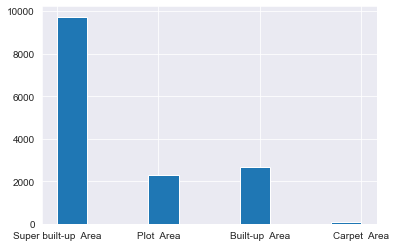

In [31]:
#import matplotlib.pyplot as plt
data2['area_type'].hist()

# availability

In [32]:
data2['availability'].value_counts()

Ready To Move    11743
18-Dec             351
18-May             324
18-Apr             296
18-Aug             225
                 ...  
15-Aug               1
16-Nov               1
16-Jan               1
14-Jul               1
16-Apr               1
Name: availability, Length: 82, dtype: int64

In [33]:
# Ready To Move
# Immediate Possession
# Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec

In [34]:
# One Hot Encoding Use

<AxesSubplot:>

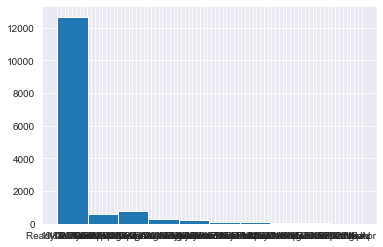

In [35]:
data2['availability'].hist( bins = 10)

# location

In [36]:
data2['location'].isnull().sum()

1

In [37]:
top_253_values = data2['location'].value_counts().sort_values(ascending=False).head(253).index

In [38]:
top_253_values

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Marathahalli',
       ...
       'KUDLU MAIN ROAD', '4th Block Koramangala', 'Pattandur Agrahara',
       'Nehru Nagar', 'Kaverappa Layout', 'Ganga Nagar', 'MS Pallya',
       'Chandra Layout', 'Sarjapur Road, ', 'HAL 2nd Stage'],
      dtype='object', length=253)

In [39]:
data2['location']= data2['location'].fillna(data2['location'].mode()[0])

In [40]:
data2['location'].isnull().sum()

0

In [41]:
data3 = data2.copy()

# size

In [42]:
data3['size'].isnull().sum()

18

In [43]:
data3['size'].dtype

dtype('O')

In [44]:
total_unique_values = data3['size'].unique()

In [45]:
total_unique_values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom', '16 Bedroom'], dtype=object)

In [46]:
# BHK
# Bedroom
# RK
# nan

In [47]:
data3['size'].value_counts()

2 BHK         5739
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom      208
1 Bedroom      122
7 Bedroom       95
8 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
1 RK            15
10 Bedroom      15
9 BHK           13
8 BHK            8
10 BHK           2
11 BHK           2
11 Bedroom       2
19 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
16 Bedroom       1
Name: size, dtype: int64

In [48]:
#!pip install nums_from_string

In [49]:
# new feature size_sqft
import nums_from_string
# Bangalaure 1BHK is different from others
# Also RK and Badroom

index = 0

for feature in data3['size']:
    
    
    if str('BHK') in str(feature) or str('RK') in str(feature):
        kos = nums_from_string.get_nums(feature)
        #print(kos)
        #print(type(kos))
        ans = 450*int(kos[0])
        data3.at[index,'size_sqft'] = ans
        index += 1
    elif str('Bedroom') in str(feature):
        kos = nums_from_string.get_nums(feature)
        ans = 160*int(kos[0])
        data3.at[index,'size_sqft'] = ans
        index += 1
    else:
        data3.at[index,'size_sqft'] =  data3.at[index,'size']
        index += 1
        
        
        
        
        
        
        



In [50]:
data3['size_sqft'].unique()

array([  900.,   640.,  1350.,  1800.,   960.,   480.,   450.,   160.,
        1280.,   320.,  1120.,  2250.,  3150.,  2700.,   800.,  4950.,
        4050.,    nan,  1440., 12150.,  1600.,  1760.,  4500.,  8550.,
        7200.,  6880.,  6300.,  3600.,  1920.,  5850.,  2880.,  2560.])

In [51]:
# Nan value replaced
data3['size_sqft'] = data3['size_sqft'].fillna(data3['size_sqft'].mean())

In [52]:
data3['size_sqft'].isnull().sum()

0

In [53]:
data4 = data3.copy()

# location

In [54]:
data4['location'].isnull().sum()

0

In [55]:
data4['location'].value_counts()

Whitefield                         592
Sarjapur  Road                     437
Electronic City                    337
Kanakpura Road                     298
Thanisandra                        277
                                  ... 
K R C kothanur                       1
1Channasandra                        1
Vijayabank bank layout               1
Saptagiri Layout                     1
Vishweswaraiah Layout 4th Block      1
Name: location, Length: 1358, dtype: int64

In [56]:
label_encoder = LabelEncoder()

data4['location_encoded'] = label_encoder.fit_transform(data4['location'])

In [57]:
data4

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,size_sqft,location_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,900.0,430
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,640.0,325
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,1440.0,1350.0,1219
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1350.0,778
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,1200.0,900.0,736
...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,900.0,1284
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,1660.0,1350.0,477
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,900.0,314
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,900.0,1208


In [58]:
data5 = data4.copy()

# Socity

In [59]:
data5['society'].isnull().sum()

6128

In [60]:
data5['society'].value_counts().sort_values(ascending=False).head(50)

GrrvaGr    92
PrarePa    78
Prtates    64
Sryalan    63
Bhmesy     63
GMown E    60
Prityel    57
Prarkun    57
PrityTr    55
Prtanha    54
Dhalsh     52
IBityin    48
Soitya     45
Soresea    42
SNity S    40
Bhe 2ko    39
Rosha I    39
Adeatlm    39
SunceEs    38
SNnia E    38
Prncyrn    34
Prlla C    34
JRrnauv    33
PhestOn    31
DLhtsnd    31
Puachal    31
MenueNo    30
PuandHi    29
Raard B    29
GoAirej    29
Dieldli    28
Aklia R    28
ViistLa    28
RothaVa    27
Soazak     26
PualeSk    26
Brnia G    25
Sodgere    25
Shitt S    25
Soiewre    25
AsastDe    24
Itelaa     24
Brway G    24
DLhtsan    24
Prrtht     23
Eladero    23
Jaades     23
SoechHa    22
RInceeg    22
Klark L    21
Name: society, dtype: int64

In [61]:
data5['society'] = data5['society'].fillna(data5['society'].mode()[0])

In [62]:
data5['society'].isnull().sum()

0

In [63]:
data5['society'].dtype

dtype('O')

In [64]:
label_encoder = LabelEncoder()
data5['society_encoded'] = label_encoder.fit_transform(data5['society']).astype('float64')

In [65]:
data5['society_encoded']

0         487.0
1        2568.0
2         852.0
3        2302.0
4         852.0
          ...  
14795    1675.0
14796     852.0
14797    2626.0
14798    2071.0
14799    1284.0
Name: society_encoded, Length: 14800, dtype: float64

In [66]:
data6 = data5.copy()

In [67]:
data6

,area_type,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,900.0,430,487.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,640.0,325,2568.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,1440.0,1350.0,1219,852.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1350.0,778,2302.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,1200.0,900.0,736,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,900.0,1284,1675.0
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,GrrvaGr,1660,3.0,2.0,1660.0,1350.0,477,852.0
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,900.0,314,2626.0
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,900.0,1208,2071.0


In [68]:
data6['area_type'].value_counts()

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64

In [69]:
# One Hot Encoding in area_type

data6 = pd.get_dummies(data6,columns = ['area_type'])

#data6['area_type_encoded'] = label_encoder.fit_transform(data6['area_type']).astype('float64')




In [70]:
data6

,availability,location,size,society,total_sqft,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,1056.0,900.0,430,487.0,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,2600.0,640.0,325,2568.0,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,1440.0,1350.0,1219,852.0,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,1521.0,1350.0,778,2302.0,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,1200.0,900.0,736,852.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,1246.0,900.0,1284,1675.0,0,0,0,1
14796,Ready To Move,Gottigere,3 BHK,GrrvaGr,1660,3.0,2.0,1660.0,1350.0,477,852.0,0,0,0,1
14797,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,1216.0,900.0,314,2626.0,0,0,0,1
14798,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,996.0,900.0,1208,2071.0,1,0,0,0


In [71]:
data7 = data6.copy()

In [72]:
# extract the values

data7.drop(columns=data7.columns[:5],axis=1, inplace=True)

In [73]:
data7

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1.0,1056.0,900.0,430,487.0,0,0,0,1
1,5.0,3.0,2600.0,640.0,325,2568.0,0,0,1,0
2,2.0,3.0,1440.0,1350.0,1219,852.0,1,0,0,0
3,3.0,1.0,1521.0,1350.0,778,2302.0,0,0,0,1
4,2.0,1.0,1200.0,900.0,736,852.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14795,2.0,1.0,1246.0,900.0,1284,1675.0,0,0,0,1
14796,3.0,2.0,1660.0,1350.0,477,852.0,0,0,0,1
14797,2.0,2.0,1216.0,900.0,314,2626.0,0,0,0,1
14798,2.0,1.0,996.0,900.0,1208,2071.0,1,0,0,0


In [74]:
data7.isnull().sum()

bath                               80
balcony                           678
total_sqft_new                      0
size_sqft                           0
location_encoded                    0
society_encoded                     0
area_type_Built-up  Area            0
area_type_Carpet  Area              0
area_type_Plot  Area                0
area_type_Super built-up  Area      0
dtype: int64

In [75]:
# Bath

data7['bath'] = data7['bath'].fillna(data7['bath'].mean()+1)

In [76]:
data7['bath'].isnull().sum()

0

In [77]:
# Balcony

data7['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [78]:
data7['balcony'].value_counts()

2.0    5658
1.0    5444
3.0    1861
0.0    1159
Name: balcony, dtype: int64

In [79]:
data7['balcony'].mean()

1.582141339753576

In [80]:
data7['balcony'] = data7['balcony'].fillna(data7['balcony'].mean()+1)

In [81]:
data7['balcony'].isnull().sum()

0

In [82]:
data8 = data7.copy()

In [83]:
data8

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1.0,1056.0,900.0,430,487.0,0,0,0,1
1,5.0,3.0,2600.0,640.0,325,2568.0,0,0,1,0
2,2.0,3.0,1440.0,1350.0,1219,852.0,1,0,0,0
3,3.0,1.0,1521.0,1350.0,778,2302.0,0,0,0,1
4,2.0,1.0,1200.0,900.0,736,852.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14795,2.0,1.0,1246.0,900.0,1284,1675.0,0,0,0,1
14796,3.0,2.0,1660.0,1350.0,477,852.0,0,0,0,1
14797,2.0,2.0,1216.0,900.0,314,2626.0,0,0,0,1
14798,2.0,1.0,996.0,900.0,1208,2071.0,1,0,0,0


In [84]:
data8.corr()

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
bath,1.000000,0.247079,0.051391,0.445434,0.003084,-0.075444,-0.017806,-0.008297,0.377525,-0.271330
balcony,0.247079,1.000000,0.011836,0.315329,0.000016,-0.006290,-0.062356,-0.015189,-0.064027,0.101965
total_sqft_new,0.051391,0.011836,1.000000,0.005273,-0.000109,-0.007538,0.007257,-0.002724,0.037627,-0.034059
size_sqft,0.445434,0.315329,0.005273,1.000000,-0.005195,0.070231,-0.026570,0.019955,-0.390004,0.314901
location_encoded,0.003084,0.000016,-0.000109,-0.005195,1.000000,-0.003154,-0.028987,-0.022839,0.001181,0.026541
society_encoded,-0.075444,-0.006290,-0.007538,0.070231,-0.003154,1.000000,-0.030670,-0.002177,-0.174727,0.158221
area_type_Built-up Area,-0.017806,-0.062356,0.007257,-0.026570,-0.028987,-0.030670,1.000000,-0.038264,-0.200983,-0.653206
area_type_Carpet Area,-0.008297,-0.015189,-0.002724,0.019955,-0.022839,-0.002177,-0.038264,1.000000,-0.034653,-0.112623
area_type_Plot Area,0.377525,-0.064027,0.037627,-0.390004,0.001181,-0.174727,-0.200983,-0.034653,1.000000,-0.591556
area_type_Super built-up Area,-0.271330,0.101965,-0.034059,0.314901,0.026541,0.158221,-0.653206,-0.112623,-0.591556,1.000000


<AxesSubplot:>

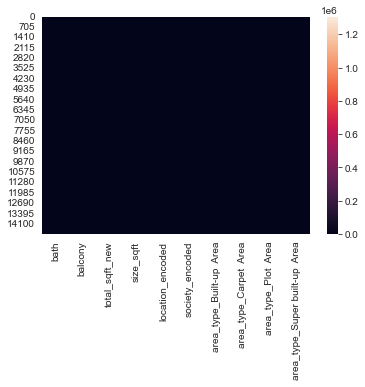

In [85]:
sns.heatmap(data8)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


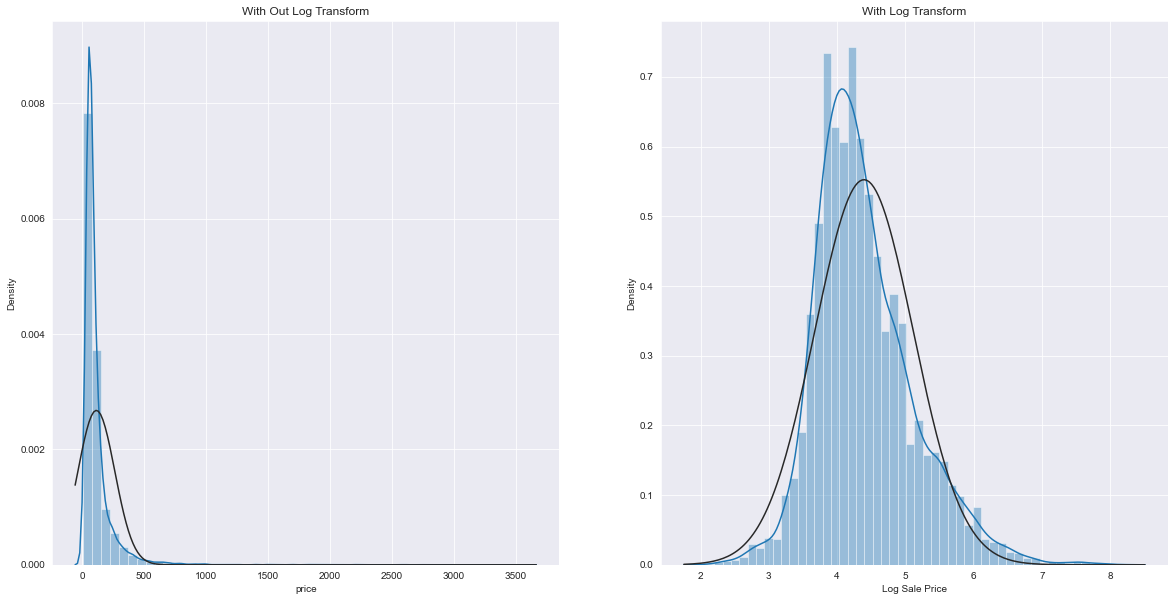

In [87]:
import scipy.stats
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit = scipy.stats.norm)
plt.title("With Out Log Transform")
plt.subplot(1,2,2)
sns.distplot(np.log(target),kde=True,fit = scipy.stats.norm)
plt.xlabel('Log Sale Price')
plt.title("With Log Transform")

plt.show()

In [88]:
log_target = np.log(target)

In [89]:
log_target

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13315    5.442418
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 13320, dtype: float64

In [90]:
train_final = data8.loc[:df.index.max(), :].copy()
test_final = data8.loc[df.index.max() + 1:, :].reset_index(drop=True).copy()

In [91]:
train_final.shape

(13320, 10)

In [92]:
train_final

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1.000000,1056.0,900.0,430,487.0,0,0,0,1
1,5.0,3.000000,2600.0,640.0,325,2568.0,0,0,1,0
2,2.0,3.000000,1440.0,1350.0,1219,852.0,1,0,0,0
3,3.0,1.000000,1521.0,1350.0,778,2302.0,0,0,0,1
4,2.0,1.000000,1200.0,900.0,736,852.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.000000,3453.0,800.0,1296,220.0,1,0,0,0
13316,5.0,2.582141,3600.0,1800.0,1039,852.0,0,0,0,1
13317,2.0,1.000000,1141.0,900.0,1004,1280.0,1,0,0,0
13318,4.0,1.000000,4689.0,1800.0,937,2321.0,0,0,0,1


In [93]:
test_final.shape

(1480, 10)

In [94]:
print(train_final.isnull().sum())
print(test_final.isnull().sum())

bath                              0
balcony                           0
total_sqft_new                    0
size_sqft                         0
location_encoded                  0
society_encoded                   0
area_type_Built-up  Area          0
area_type_Carpet  Area            0
area_type_Plot  Area              0
area_type_Super built-up  Area    0
dtype: int64
bath                              0
balcony                           0
total_sqft_new                    0
size_sqft                         0
location_encoded                  0
society_encoded                   0
area_type_Built-up  Area          0
area_type_Carpet  Area            0
area_type_Plot  Area              0
area_type_Super built-up  Area    0
dtype: int64


In [95]:
log_target.dtype

dtype('float64')

In [96]:
train_final.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
dtype: object

In [97]:
test_final.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
dtype: object

# Model Selection

In [98]:
data10 = pd.concat([train_final , log_target],axis = 1)


In [99]:
data10

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price
0,2.0,1.000000,1056.0,900.0,430,487.0,0,0,0,1,3.665355
1,5.0,3.000000,2600.0,640.0,325,2568.0,0,0,1,0,4.787492
2,2.0,3.000000,1440.0,1350.0,1219,852.0,1,0,0,0,4.127134
3,3.0,1.000000,1521.0,1350.0,778,2302.0,0,0,0,1,4.553877
4,2.0,1.000000,1200.0,900.0,736,852.0,0,0,0,1,3.931826
...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.000000,3453.0,800.0,1296,220.0,1,0,0,0,5.442418
13316,5.0,2.582141,3600.0,1800.0,1039,852.0,0,0,0,1,5.991465
13317,2.0,1.000000,1141.0,900.0,1004,1280.0,1,0,0,0,4.094345
13318,4.0,1.000000,4689.0,1800.0,937,2321.0,0,0,0,1,6.190315


In [100]:
data10.columns

Index(['bath', 'balcony', 'total_sqft_new', 'size_sqft', 'location_encoded',
       'society_encoded', 'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area', 'price'],
      dtype='object')

In [101]:
data10.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
price                             float64
dtype: object

In [102]:
data10

,bath,balcony,total_sqft_new,size_sqft,location_encoded,society_encoded,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price
0,2.0,1.000000,1056.0,900.0,430,487.0,0,0,0,1,3.665355
1,5.0,3.000000,2600.0,640.0,325,2568.0,0,0,1,0,4.787492
2,2.0,3.000000,1440.0,1350.0,1219,852.0,1,0,0,0,4.127134
3,3.0,1.000000,1521.0,1350.0,778,2302.0,0,0,0,1,4.553877
4,2.0,1.000000,1200.0,900.0,736,852.0,0,0,0,1,3.931826
...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.000000,3453.0,800.0,1296,220.0,1,0,0,0,5.442418
13316,5.0,2.582141,3600.0,1800.0,1039,852.0,0,0,0,1,5.991465
13317,2.0,1.000000,1141.0,900.0,1004,1280.0,1,0,0,0,4.094345
13318,4.0,1.000000,4689.0,1800.0,937,2321.0,0,0,0,1,6.190315


In [103]:
data10.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
price                             float64
dtype: object

In [104]:
#data10['location_encoded'] = data10['location_encoded'].astype(int).astype(float)

In [105]:
data10.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
price                             float64
dtype: object

In [106]:
from pycaret.regression import *

model_select = setup(data10 , target ='price')

ModuleNotFoundError: No module named 'pycaret'

In [111]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2272,0.1052,0.3240,0.7969,0.0581,0.0516,0.150
rf,Random Forest Regressor,0.2311,0.1183,0.3435,0.7718,0.0614,0.0522,2.472
gbr,Gradient Boosting Regressor,0.2571,0.1240,0.3517,0.7608,0.0634,0.0586,0.626
et,Extra Trees Regressor,0.2400,0.1289,0.3589,0.7511,0.0641,0.0542,1.654
knn,K Neighbors Regressor,0.2707,0.1589,0.3981,0.6935,0.0717,0.0611,0.078
ada,AdaBoost Regressor,0.3413,0.1984,0.4451,0.6174,0.0830,0.0806,0.363
dt,Decision Tree Regressor,0.2997,0.2106,0.4588,0.5922,0.0815,0.0675,0.052
lar,Least Angle Regression,0.4047,0.3052,0.5519,0.4103,0.0971,0.0919,0.018
br,Bayesian Ridge,0.4047,0.3052,0.5519,0.4103,0.0971,0.0919,0.019
ridge,Ridge Regression,0.4047,0.3052,0.5519,0.4103,0.0971,0.0919,0.017


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1289, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [112]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2219,0.0909,0.3016,0.8144,0.0546,0.0504
1,0.2208,0.0960,0.3099,0.8200,0.0557,0.0497
2,0.2250,0.1053,0.3244,0.7783,0.0582,0.0513
3,0.2192,0.0952,0.3085,0.8207,0.0553,0.0503
4,0.2373,0.1251,0.3538,0.7640,0.0641,0.0539
5,0.2398,0.1154,0.3396,0.7973,0.0606,0.0549
6,0.2201,0.1061,0.3257,0.7866,0.0581,0.0492
7,0.2392,0.1148,0.3389,0.7757,0.0616,0.0549
8,0.2288,0.1049,0.3239,0.8099,0.0584,0.0521


In [113]:
lightgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1289,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [108]:
lgbm_params = {
 'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1289,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0
}
catboost_params = {
     'iterations': 6000,
     'learning_rate': 0.005,
     'depth': 4,
     'l2_leaf_reg': 1,
     'eval_metric':'RMSE',
     'early_stopping_rounds': 200,
     'random_seed': 42
 }

#kf = KFold(n_splits=10)

#result = np.exp(np.sqrt(-cross_val_score(LGBMRegressor(**lightgbm_params), train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))


lgbm = LGBMRegressor(**lgbm_params)
lgbm.fit(train_final,log_target)

lgbm_pred = np.exp(lgbm.predict(test_final))
submission = pd.concat([test_columns,pd.Series(lgbm_pred , name = 'price')],axis = 1)
submission.to_csv(r'F:\Machine Learning\Macine Hack\Data\LightGBM.csv')

    

In [109]:
cat = CatBoostRegressor(**catboost_params)
cat.fit(train_final,log_target)

cat_pred = np.exp(cat.predict(test_final))
submission1 = pd.concat([test_columns,pd.Series(cat_pred , name = 'price')],axis = 1)
submission1.to_csv(r'F:\Machine Learning\Macine Hack\Data\CatBoost.csv')


0:	learn: 0.7196770	total: 54.4ms	remaining: 5m 26s
1:	learn: 0.7173957	total: 56.3ms	remaining: 2m 48s
2:	learn: 0.7151586	total: 58.8ms	remaining: 1m 57s
3:	learn: 0.7129168	total: 60.5ms	remaining: 1m 30s
4:	learn: 0.7106977	total: 62.2ms	remaining: 1m 14s
5:	learn: 0.7084522	total: 63.9ms	remaining: 1m 3s
6:	learn: 0.7063131	total: 65.6ms	remaining: 56.2s
7:	learn: 0.7041026	total: 67.3ms	remaining: 50.4s
8:	learn: 0.7019269	total: 69ms	remaining: 45.9s
9:	learn: 0.6998548	total: 70.7ms	remaining: 42.3s
10:	learn: 0.6978318	total: 73ms	remaining: 39.7s
11:	learn: 0.6958304	total: 74.8ms	remaining: 37.3s
12:	learn: 0.6937106	total: 76.5ms	remaining: 35.2s
13:	learn: 0.6915904	total: 78.2ms	remaining: 33.4s
14:	learn: 0.6895568	total: 79.9ms	remaining: 31.9s
15:	learn: 0.6875015	total: 82.7ms	remaining: 30.9s
16:	learn: 0.6854422	total: 84.7ms	remaining: 29.8s
17:	learn: 0.6834286	total: 87.8ms	remaining: 29.2s
18:	learn: 0.6814124	total: 89.7ms	remaining: 28.2s
19:	learn: 0.6795231	

In [ ]:
# catboost_params = {
#     'iterations': 6000,
#     'learning_rate': 0.005,
#     'depth': 4,
#     'l2_leaf_reg': 1,
#     'eval_metric':'RMSE',
#     'early_stopping_rounds': 200,
#     'random_seed': 42
# }

# br_params = {
#     'n_iter': 304,
#     'tol': 0.16864712769300896,
#     'alpha_1': 5.589616542154059e-07,
#     'alpha_2': 9.799343618469923,
#     'lambda_1': 1.7735725582463822,
#     'lambda_2': 3.616928181181732e-06
# }

# lightgbm_params = {
#     'num_leaves': 39,
#     'max_depth': 2,
#     'learning_rate': 0.13705339989856127,
#     'n_estimators': 273
# }

# ridge_params = {
#     'alpha': 631.1412445239156
# }

In [ ]:
# models = {
#     "catboost": CatBoostRegressor(**catboost_params, verbose=0),
#     "br": BayesianRidge(**br_params),
#     "lightgbm": LGBMRegressor(**lightgbm_params),
#     "ridge": Ridge(**ridge_params),
#     "omp": OrthogonalMatchingPursuit()
# }

In [ ]:
# for name, model in models.items():
#     model.fit(train_final, log_target)
#     print(name + " trained.")

In [ ]:
# results = {}

# kf = KFold(n_splits=10)

# for name, model in models.items():
#     result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
#     results[name] = result

In [ ]:
#results

In [ ]:
# for name, result in results.items():
#     print("----------\n" + name)
#     print(np.mean(result))
#     print(np.std(result))

In [ ]:
# final_predictions = (
#     0.4 * np.exp(models['catboost'].predict(test_final)) +
#     0.2 * np.exp(models['br'].predict(test_final)) +
#     0.2 * np.exp(models['lightgbm'].predict(test_final)) +
#     0.1 * np.exp(models['ridge'].predict(test_final)) +
#     0.1 * np.exp(models['omp'].predict(test_final))
# )

In [ ]:
#final_predictions

In [ ]:
train_final.dtypes

bath                              float64
balcony                           float64
total_sqft_new                    float64
size_sqft                         float64
location_encoded                    int32
society_encoded                   float64
area_type_Built-up  Area            uint8
area_type_Carpet  Area              uint8
area_type_Plot  Area                uint8
area_type_Super built-up  Area      uint8
dtype: object

In [ ]:
#baseline_model =CatBoostRegressor(verbose=0)

In [ ]:
#baseline_model.fit(train_final,log_target)

In [ ]:
 kf = KFold(n_splits=10)
 results = cross_val_score(baseline_model,train_final,log_target,scoring='neg_mean_squared_error',cv=kf)

In [ ]:
# -results

In [ ]:
# -results.mean()

In [ ]:
# plt.figure(figsize=(16,10))
# sns.displot(-results)

In [ ]:
# np.exp(np.sqrt(np.mean(-results)))

In [ ]:
# target.describe()

In [ ]:
log_target

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13315    5.442418
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 13320, dtype: float64

In [ ]:
predictions = np.exp(baseline_model.predict(test_final))

In [ ]:
submission = pd.concat([test_columns,pd.Series(predictions , name = 'price')],axis = 1)

In [ ]:
submission

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,62.300555
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,275.441796
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,181.988167
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,57.056977
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,61.263692
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,69.594250
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,86.769089
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,44.851425
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,52.147210


In [ ]:
submission.to_csv('/Submission_Combined.csv')

In [ ]:
#print(np.__version__)

In [ ]:
# CatboostRegressor-0.87395